# ANN for make simulation and make prediction in physics

# import working liberary

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import RMSprop
from keras.models import load_model
import numpy as np

# global variables

In [104]:
# input variable to program
import os
# Get the name of the Excel file
#excel_files = [f for f in os.listdir('.') if f.endswith('.xlsx')]
excel_files = [f for f in os.listdir('.') if (f.endswith('.xlsx') and (not f.startswith('out')))]
inputFile = excel_files[0]   # 'All data mesons+baryons.xlsx'
inputSheetName = 'Sheet1'
print("input file : ",inputFile)


input file :  negative particles.xlsx


# read data

In [105]:
# Read the data from the excel file
data_all = pd.read_excel(inputFile,sheet_name=inputSheetName)
temp_data_all = data_all # data_all[data_all['spectrum']<60]
data =temp_data_all.reset_index(drop=True)

# Split the data into input and output variables
X = data[['mass','s','N part','Pt']]
y = data['spectrum'].to_frame('spectrum')

print(X.head)
print(y.head)

<bound method NDFrame.head of          mass     s  N part     Pt
0     0.13957   7.7     337  0.275
1     0.13957   7.7     337  0.325
2     0.13957   7.7     337  0.375
3     0.13957   7.7     337  0.425
4     0.13957   7.7     337  0.475
...       ...   ...     ...    ...
3153  0.93827  39.0      14  1.550
3154  0.93827  39.0      14  1.650
3155  0.93827  39.0      14  1.750
3156  0.93827  39.0      14  1.850
3157  0.93827  39.0      14  1.950

[3158 rows x 4 columns]>
<bound method NDFrame.head of       spectrum
0     114.8980
1      83.9507
2      62.4481
3      46.3708
4      34.7823
...        ...
3153    0.0027
3154    0.0018
3155    0.0012
3156    0.0008
3157    0.0005

[3158 rows x 1 columns]>


# normaliz input

In [106]:
# Normalize the input
from sklearn.preprocessing import RobustScaler
# Create a RobustScaler object
scaler = RobustScaler()
# Fit the scaler to the input data and transform it
X_normalized = scaler.fit_transform(X)
# Print the normalized input data
print('X_normalized')
print(X_normalized)
X_train = X_normalized
#X_train = X
print('X_train')
print(X_train) 


X_normalized
[[-0.4433542  -0.76774194  1.1957672  -0.67857143]
 [-0.4433542  -0.76774194  1.1957672  -0.60714286]
 [-0.4433542  -0.76774194  1.1957672  -0.53571429]
 ...
 [ 0.5566458   1.2516129  -0.51322751  1.42857143]
 [ 0.5566458   1.2516129  -0.51322751  1.57142857]
 [ 0.5566458   1.2516129  -0.51322751  1.71428571]]
X_train
[[-0.4433542  -0.76774194  1.1957672  -0.67857143]
 [-0.4433542  -0.76774194  1.1957672  -0.60714286]
 [-0.4433542  -0.76774194  1.1957672  -0.53571429]
 ...
 [ 0.5566458   1.2516129  -0.51322751  1.42857143]
 [ 0.5566458   1.2516129  -0.51322751  1.57142857]
 [ 0.5566458   1.2516129  -0.51322751  1.71428571]]


# loada saved model

In [107]:
# Load the saved model

# Rename the out model
""" modelName =str.split(inputFile,'.')[0]  + '.h5'
modelName = str.replace(modelName,' ','_')
modelName = str.replace(modelName,'+','_plus_')
modelName = str.replace(modelName,'-','_Negativ_')
print('modelName is : ',modelName) """

""" # load the saved model
modelNames = [f for f in os.listdir('.') if (f.endswith('.h5'))]
modelName = modelNames[0]
"""

myepochs = int(100) 
mybatchSize = int(16)

# load the selected model
#model = load_model(modelName)

# give the model name 
modelName = "all_negative.h5"

#configure output parameters
outputFile = 'out_- '+modelName+' .xlsx'
summaryOutFile = modelName + ' - Summary .txt'
outputSheetName = 'predicat_ '+modelName+' '
nameFigImg = 'fig_in4_ '+modelName+' .png'

# define the model - compile - fit - save

In [108]:

''' Define the model '''
# Define the model
model = Sequential(name=modelName)
# Add the first dense layer
model.add(Dense(40, input_dim=4, activation='relu'))

# Add batch normalization
#model.add(BatchNormalization())
model.add(Dense(40, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))

# Add the output layer
model.add(Dense(1))

''' # compile the model      '''
# Compile the model with Levenberg-Marquardt optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.001,)
model.compile(loss='mean_squared_error', optimizer=optimizer)

''' train the model & save current compiled model  '''
# Train the model
#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
model.fit(X_train, y, epochs=myepochs, batch_size=mybatchSize) 
# Save the model
model.save(modelName) 




Epoch 1/100
198/198 [==============================] - 1s 2ms/step - loss: 163.2345
Epoch 2/100
198/198 [==============================] - 0s 2ms/step - loss: 72.8637
Epoch 3/100
198/198 [==============================] - 0s 2ms/step - loss: 54.4422
Epoch 4/100
198/198 [==============================] - 0s 2ms/step - loss: 46.7730
Epoch 5/100
198/198 [==============================] - 0s 2ms/step - loss: 41.2010
Epoch 6/100
198/198 [==============================] - 0s 2ms/step - loss: 32.5325
Epoch 7/100
198/198 [==============================] - 0s 2ms/step - loss: 28.8373
Epoch 8/100
198/198 [==============================] - 0s 2ms/step - loss: 23.3274
Epoch 9/100
198/198 [==============================] - 0s 2ms/step - loss: 25.3163
Epoch 10/100
198/198 [==============================] - 0s 2ms/step - loss: 22.1069
Epoch 11/100
198/198 [==============================] - 0s 2ms/step - loss: 23.6505
Epoch 12/100
198/198 [==============================] - 0s 2ms/step - loss: 24.2080


d:\Repos\ReposEda\DrSamahPrjs\ANN\ANN\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluate the model and make prediction 

In [109]:
from sklearn.metrics import mean_squared_error

# Make predictions on new data
X_test =pd.DataFrame(X_train) #scaler.transform(X)
#X_test = scaler.fit_transform(X)
print("new_data is : ")
print(X_test)
predictions = model.predict(X_test)
predictions = predictions.flatten()
predictions = pd.Series(predictions)
predictions = predictions.to_frame('predictions')
print("predictions is : ")
print(predictions)

# Evaluate the model
score = model.evaluate(X_test, y)
print("score " , score)
print(score)
mse = mean_squared_error(y,predictions)
print('mse' , mse)


new_data is : 
             0         1         2         3
0    -0.443354 -0.767742  1.195767 -0.678571
1    -0.443354 -0.767742  1.195767 -0.607143
2    -0.443354 -0.767742  1.195767 -0.535714
3    -0.443354 -0.767742  1.195767 -0.464286
4    -0.443354 -0.767742  1.195767 -0.392857
...        ...       ...       ...       ...
3153  0.556646  1.251613 -0.513228  1.142857
3154  0.556646  1.251613 -0.513228  1.285714
3155  0.556646  1.251613 -0.513228  1.428571
3156  0.556646  1.251613 -0.513228  1.571429
3157  0.556646  1.251613 -0.513228  1.714286

[3158 rows x 4 columns]
99/99 [==============================] - 0s 1ms/step
predictions is : 
      predictions
0      109.231941
1       91.020859
2       73.533424
3       55.216022
4       41.642712
...           ...
3153     0.271246
3154     0.252037
3155     0.235352
3156     0.219289
3157     0.203224

[3158 rows x 1 columns]
99/99 [==============================] - 0s 1ms/step - loss: 7.1760
score  7.176028728485107
7.1760287284851

# draw 

shape of datap (3158, 8)
Npart values : 

N is :  337
N is :  290
N is :  226
N is :  160
N is :  110
N is :  72
N is :  45
N is :  26
N is :  14
Npart values : 
 [337 290 226 160 110  72  45  26  14]
datagraph1 : 
         Pt     err1
0    0.275  0.21538
1    0.325  0.17051
2    0.375  0.13799
3    0.425  0.11247
4    0.475  0.09267
..     ...      ...
216  1.050  0.00132
217  1.150  0.00093
218  1.250  0.00069
219  1.350  0.00057
220  1.450  0.00035

[221 rows x 2 columns]
datagraph1 : 
         Pt     err1     err2
0    0.275  0.21538  7.89015
1    0.325  0.17051  5.61535
2    0.375  0.13799  4.10800
3    0.425  0.11247  3.01883
4    0.475  0.09267  2.24990
..     ...      ...      ...
216  1.050  0.00132  0.00217
217  1.150  0.00093  0.00120
218  1.250  0.00069  0.00073
219  1.350  0.00057  0.00046
220  1.450  0.00035  0.00027

[221 rows x 3 columns]
datagraph1 : 
         Pt     err1     err2  predictions
0    0.275  0.21538  7.89015   109.231941
1    0.325  0.17051  5.61535    91

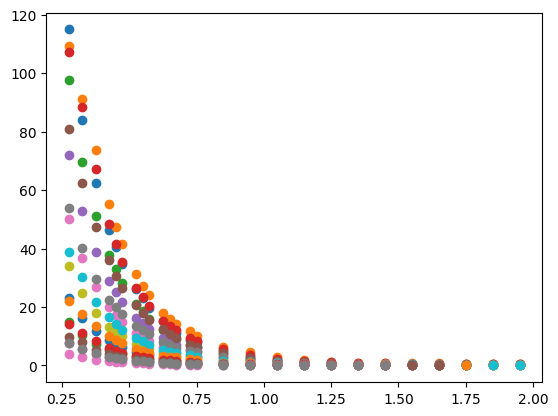

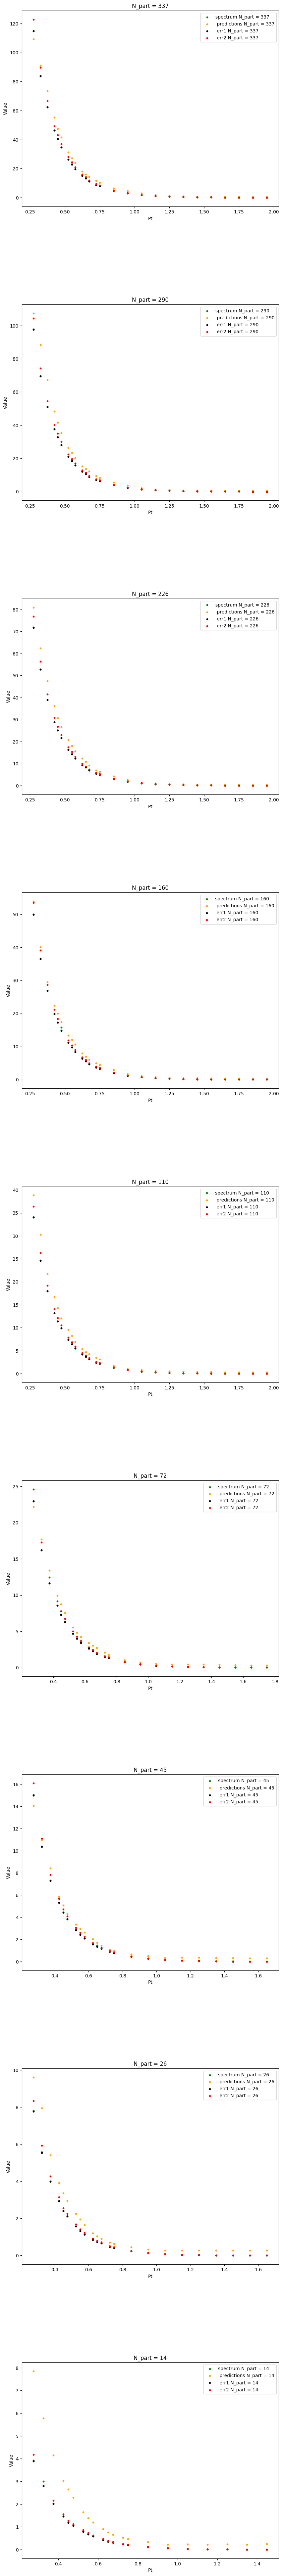

In [124]:
# for drawing in 2d i choose Pt as x-axis
error = data['spectrum'] - predictions['predictions']
error = error.to_frame('error')

datap = pd.merge(data,predictions,left_index=True, right_index=True)
print('shape of datap',datap.shape)


# xap : data
xap =pd.DataFrame(datap) # pd.DataFrame(datape12)# pd.DataFrame(datap)
# xapf : xap after filteration
xapf= pd.DataFrame(xap)
xapf = xapf[xapf['mass']==0.13957]
xapf = xapf[xapf['s']==7.7]
#xapf = xapf[xapf['N part']==337]

N_Part_Values  =xapf['N part'].unique() #xap['N part'].unique() # xapf['N part'].unique()
print('Npart values : \n')
for n in N_Part_Values:
    print('N is : ',n)
print('Npart values : \n',N_Part_Values)

#### to add err 1,2
dataGraphe1 = pd.merge(xapf['Pt'],xapf['err1'],left_index=True, right_index=True)
print('datagraph1 : \n',dataGraphe1)

dataGraphe12 = pd.merge(dataGraphe1,xapf['err2'],left_index=True, right_index=True)
print('datagraph1 : \n',dataGraphe12)
dataGraph1 = pd.merge(dataGraphe12,xapf['predictions'],left_index=True, right_index=True)
print('datagraph1 : \n',dataGraph1)

dataGraph = pd.merge(dataGraph1,xapf['spectrum'],left_index=True, right_index=True)
print('dataGraph : \n', dataGraph)
print('shape of dataGraph',dataGraph.shape)
# Plot the data and predictions
mergedData = pd.merge(dataGraph,xapf['N part'],left_index=True, right_index=True)
print('merged data is : \n',mergedData)

# modify upper and lower error values
mergedData['err1'] = mergedData['spectrum'] - mergedData['err1']
mergedData['err2'] = mergedData['err2'] + mergedData['spectrum']

yerror = mergedData['err2']-mergedData['err1']
#yerror = pd.Series(yerror)
#yerror = yerror.to_frame('yerror')
#yerror = error.to_frame('yerror')

#plt.semilogy(xapf['Pt'], xapf['spectrum']   ,'bo', label='Actual')
#plt.semilogy(xapf['Pt'], xapf['predictions'],'ro', label='Predicted')
for n in N_Part_Values:
    plt.scatter(mergedData['Pt'][mergedData['N part']==n],mergedData['spectrum'][mergedData['N part']==n])
    plt.scatter(mergedData['Pt'][mergedData['N part']==n],mergedData['predictions'][mergedData['N part']==n])
    
    #print('n test :\n',mergedData['Pt'][mergedData['N part']==n])
plt.savefig("fig-all-"+nameFigImg)
##########
#import matplotlib.pyplot as plt
# Define the list ofValues and plot the data for each iteration
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=len(N_Part_Values), ncols=1, figsize=(10, 100))

#fig, axs = plt.subplots(N_Part_Values.size,1)
for i, n in enumerate(N_Part_Values):
    
    # Plot the 'Pt' column where N_part == n
    #axs[i].errorbar(mergedData['Pt'][mergedData['N part'] == n], 
    axs[i].scatter(mergedData['Pt'][mergedData['N part'] == n], 
                 mergedData['spectrum'][mergedData['N part'] == n], 
                 #color='C{}'.format(i), 
                 #yerr=yerror,
                 s=10,
                 color='green',
                 label='spectrum N_part = {}'.format(n))

    # Plot the 'predictions' column where N_part == n
    axs[i].scatter(mergedData['Pt'][mergedData['N part'] == n], 
                 mergedData['predictions'][mergedData['N part'] == n], 
                 color='orange', s=10,
                  label=' predictions N_part = {}'.format(n))
                 #label='_nolegend_')
    # Plot the 'err1' column where N_part == n
    axs[i].scatter(mergedData['Pt'][mergedData['N part'] == n], 
                 mergedData['err1'][mergedData['N part'] == n], 
                 color='black', s=10,
                  label=' err1 N_part = {}'.format(n)) 
                 #label='_nolegend_')
    # Plot the 'err2' column where N_part == n
    axs[i].scatter(mergedData['Pt'][mergedData['N part'] == n], 
                 mergedData['err2'][mergedData['N part'] == n], 
                 color='red', s=10,
                  label=' err2 N_part = {}'.format(n)) 
                 #label='_nolegend_')
     # Plot the 'err2' column where N_part == n
    """ axs[i].plot(mergedData['Pt'][mergedData['N part'] == n], 
                 mergedData['err2'][mergedData['N part'] == n], 
                 color='black', 
                  label=' err2 N_part = {}'.format(n)) """
                 #label='_nolegend_')

    # Add a legend and axis labels to the subplot
    axs[i].legend()
    axs[i].set_xlabel('Pt')
    axs[i].set_ylabel('Value')
    axs[i].set_title('N_part = {}'.format(n))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.savefig(nameFigImg)
plt.show()


# write output to excel 

In [111]:
# Write predictions , data to Excel file
err1=data['err1'].to_frame('err1')
err2=data['err2'].to_frame('err2')
#SquareErrorForEachPoint = np.sqrt( ((datap['predictions']- datap['Spectrum'])/(err1- err2)))
SquareErrorForEachPoint =np.square( (datap['predictions']- datap['spectrum'])/(err1['err1']+ err2['err2']))

SquareErrorForEachPoint = pd.Series(SquareErrorForEachPoint)
SquareErrorForEachPoint = SquareErrorForEachPoint.to_frame('SquareErrorForEachPoint')
print('Square error for each point : ',SquareErrorForEachPoint)

outputpredicat = pd.concat([datap, SquareErrorForEachPoint], axis=1)
mysum =outputpredicat['SquareErrorForEachPoint'].sum()
mycount =(outputpredicat['SquareErrorForEachPoint'].count()) -1
rmse = np.sqrt(mysum/mycount)

#rmse = np.sqrt (np.average(outputpredicat['SquareErrorForEachPoint']))
rmse = pd.Series(rmse)
#rmse = pd.DataFrame({'rmse': rmse})
print('RMSE',rmse)

# output is data frame
#print(outputpredicat.head(10))
# Write the DataFrames to an Excel file with three sheets
with pd.ExcelWriter(outputFile) as writer:
    outputpredicat.to_excel(writer, sheet_name=outputSheetName, index=False)
    rmse.to_excel(writer, sheet_name='RMSE', index=False)


Square error for each point :        SquareErrorForEachPoint
0                4.886516e-01
1                1.493216e+00
2                6.816146e+00
3                7.979362e+00
4                8.576601e+00
...                       ...
3153             7.504348e+05
3154             1.001895e+06
3155             2.141682e+06
3156             3.945227e+06
3157             6.421404e+06

[3158 rows x 1 columns]
RMSE 0    255.866868
dtype: float64


# print model summery 

In [112]:

print("End")
#print("accuracy :" + str(accuracy))
print("score " + str(score))
SummaryOut = model.summary()
print(SummaryOut)

from io import StringIO
# summarize the model
with StringIO() as buf:
    model.summary(print_fn=lambda x: buf.write(x + '\n'))
    summary = buf.getvalue()

with open(modelName +'-summary.txt', 'w') as f:
    f.write(summary)


print(summary)
print(modelName)
print('RMSE',rmse)



End
score 7.176028728485107
Model: "all_negative.h5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 40)                200       
                                                                 
 dense_29 (Dense)            (None, 40)                1640      
                                                                 
 dense_30 (Dense)            (None, 80)                3280      
                                                                 
 dense_31 (Dense)            (None, 80)                6480      
                                                                 
 dense_32 (Dense)            (None, 40)                3240      
                                                                 
 dense_33 (Dense)            (None, 40)                1640      
                                                                 
 dense_34 (Dense)      